<h1><b>Self-Organizing Maps (SOM)</b></h1>

Στην άσκηση αυτή θα μελετήσετε μία εφαρμογή των <i>Self-Organizing Maps</i> \(<i>SOM</i>) για τη συμπίεση εικόνων. Ως είσοδο θα χρησιμοποιήσετε τη φωτογραφία του διάσημου τενίστα <i>Rafael Nadal</i> (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal.jpg">nadal.jpg</a>). Η άσκηση αυτή βασίστηκε στον κώδικα που παρέχεται <a href=https://github.com/JustGlowing/minisom/blob/master/examples/ColorQuantization.ipynb>εδώ</a>.

<h3><b>Κώδικας</b></h3>

In [3]:
!pip install minisom
!pip install numpy
!pip install matplotlib

Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.021099834467468326
quantization...


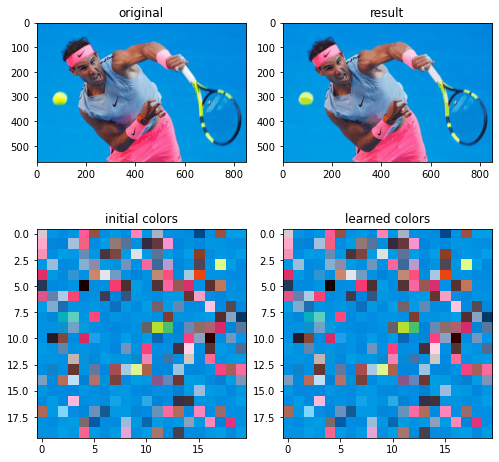

In [4]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# import matplotlib
# matplotlib.rc_file_defaults()

# read the image and return the RGB values for each pixel
img = plt.imread('nadal.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('Training SOM...')
# 20 x 20 neurons grid, 3 features
som = MiniSom(20, 20, 3, learning_rate=0.05, neighborhood_function='bubble')
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

<h3><b>Ερωτήσεις</b><h3>
<ul>
<li>Να περιγράψετε συνοπτικά τη λειτουργία των <i>SOM</i>.</li>
<li>Να αναφέρετε ενδεικτικές εφαρμογές των <i>SOM</i>.</li>
<li>Με τη βοήθεια της εκφώνησης και του διαθέσιμου κώδικα να περιγράψετε συνοπτικά τη λογική με την οποία πραγματοποιείται η συμπίεση των εικόνων της άσκησης.</li>
<li>Να τρέξετε τον κώδικα με μέγεθος πλέγματος 2x2 αρκετές φορές. Τι παρατηρείτε σχετικά με τη διακύμανση των τιμών του σφάλματος κβάντισης; Να αιτιολογήσετε γιατί συμβαίνει αυτό εξετάζοντας τον κώδικα της άσκησης.</li>
<li>Να τρέξετε τον κώδικα της άσκησης για μεγέθη πλέγματος <i>SOM</i> 2x2, 3x3, 4x4, ..., 15x15, διατηρώντας το πλέγμα τετραγωνικό. Να σχεδιάσετε σε ένα γράφημα τις τιμές του σφάλματος κβάντισης. Τι παρατηρείτε σχετικά με την εξέλιξη της τιμής του σφάλματος κβάντισης, καθώς αυξάνεται το μέγεθος του πλέγματος;</li>
<li>Βασισμένοι στα αποτελέσματα των προηγούμενων ερωτημάτων να επιλέξετε, κατά προσέγγιση, το κατάλληλο μέγεθος πλέγματος που προσφέρει μία ικανοποιητική ανακατασκευή της αρχικής εικόνας, δηλαδή επιστρέφει αποδεκτό σφάλμα κβάντισης και αποδεκτό μέγεθος συμπίεσης.
</li>
<li>Να εφαρμόσετε το SOM grid που λάβατε στα προηγούμενα ερωτήματα για μία άλλη εικόνα του Nadal (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal2.jpg">nadal2.jpg</a>), που προέρχεται από τον ίδιο αγώνα. Η εικόνα αυτή έχει περίπου το ίδιο μέγεθος με την αρχική εικόνα. Τι παρατηρείτε; Στην περίπτωση που δίνατε ως είσοδο στο SOM έναν άλλο τενίστα, θα είχατε το ίδιο καλά αποτελέσματα;</li>
</ul>

## <i>Να περιγράψετε συνοπτικά τη λειτουργία των <i>SOM</i><i>

Τα Self Organizing Maps (SOM) που αναπτύχθηκαν από τον Teuvo Kohonen παρέχουν μια τεχνική οπτικοποίησης δεδομένων που βοηθά την κατανόηση δεδομένων υψηλών διαστάσεων, μειώνοντας τη διαστατικότητα αυτή των δεδομένων σε έναν δισδιάστατο χώρο. Παράλληλα, τα SOM επίσης υλοποιούν ένα clustering concept, ομαδοποιώντας παρόμοια δεδομένα μαζί.

Ο τρόπος που δουλεύει ο αλγόριθμος για το SOM είναι ο εξής:

Καταρχάς, επιλέγεται ένας αριθμός νευρώνων/κόμβων σε πλέγμα πχ 5x5, ήτοι 25 νευρώνες και αρχικοποιούνται τα βάρη τους (ίδιας διάστασης με τα χαρακτηριστικά των δειγματικών στοιχείων).
Ύστερα, για κάθε δειγματικό στοιχείο (εκπαίδευσης) το οποίο επιλέγεται τυχαία, βρίσκεται ο νευρώνας του πλέγματος νευρώνων που βρίσκεται σε πιο κοντινή απόσταση (απόσταση μεταξύ των χαρακτηριστικών του δειγματικού στοιχείου και των βαρών των νευρώνων) και ο νευρώνας αυτός θεωρείται ως νικητής ή ενεργός νευρώνας. Στη συνέχεια τα βάρη όλων των νευρώνων ανανεώνονται με τέτοιον τρόπο ώστε ο ενεργός νευρώνας να μετακινηθεί κοντύτερα στο υπό εξέταση δειγματικό στοιχείο, συμπαρασύροντας ωστόσο και τους υπόλοιπους νευρώνες προς την κατεύθυνση αυτή, επιδρώντας, όμως, λιγότερο σε εκείνους (μικρότερη κίνηση προς το δειγματικό στοιχείο). Έτσι, περνώντας όλα τα δειγματικά στοιχεία και επαναλαμβάνοντας για έναν αριθμό επαναλήψεων (εποχές), οι νευρώνες μετακινούνται κοντά σε περιοχές δειγματικών στοιχείων δημιουργώντας clusters στα οποία οι νευρώνες λειτουργούν ως κέντρα. Το μέγεθος της ανανέωσης φθίνει ανάλογα με τον αριθμό των εποχών ώστε να υπάρχει σύγκλιση.

Με αυτόν τον τρόπο διατηρούνται οι τοπολογικές και μετρικές σχέσης των δεδομένων προς οπτικοποίηση, κάνοντας συμπίεση και μείωση διαστάσεων.


## <i>Να αναφέρετε ενδεικτικές εφαρμογές των SOM</i>

- Unsupervised clustering και mapping σε 2 διαστάσεις δεδομένων υψηλής διαστατικότητα
πχ κατηγοριοποίηση ταινιών με βάση τα χαρακτηριστικά τους σε clusters που αντικατοπτρίζουν το είδος τους
- Συμπίεση
πχ σε εικόνες, με mapping των pixels σε ένα αντιπροσωπευτικό τους με άλλη τιμή
- Ανίχνευση outliers υπολογίζοντας την στατιστική συνάφεια ενός νέου παραδείγματος με τα αποθηκευμένα πρότυπα

## <i>Με τη βοήθεια της εκφώνησης και του διαθέσιμου κώδικα να περιγράψετε συνοπτικά τη λογική με την οποία πραγματοποιείται η συμπίεση των εικόνων της άσκησης.</i>

Αρχικά, επιλέγεται ένα grid 20 x 20 νευρώνων, επομένως θα δημιουργηθούν 400 clusters από τιμές RGB (3 χαρακτηριστικά), που θα ομαδοποιούν τα δεδομένα.

Με βάση αυτά τα clusters που μοντελοποιούνται από τις τιμές των βαρών των νευρώνων, με την εντολή `qnt = som.quantization(pixels)` γίνονται map οι τιμές κάθε δειγματικού στοιχείου στις τιμές του κοντινότερου νευρώνα.
Έτσι επιτυγχάνεται η συμπίεση της εικόνας αφού περιορίζεται το εύρος των τιμών που χρησιμοποιούνται για την απεικόνιση των RGB χρωμάτων.

## <i>Να τρέξετε τον κώδικα με μέγεθος πλέγματος 20x20 αρκετές φορές. Τι παρατηρείτε σχετικά με τη διακύμανση των τιμών του σφάλματος κβάντισης; Να αιτιολογήσετε γιατί συμβαίνει αυτό εξετάζοντας τον κώδικα της άσκησης.</i>

Training SOM...


 [  1127 / 10000 ]  11% - 0:00:02 left 

 [  1733 / 10000 ]  17% - 0:00:02 left 

 [  2276 / 10000 ]  23% - 0:00:02 left 

 [  2932 / 10000 ]  29% - 0:00:02 left 

 [  3242 / 10000 ]  32% - 0:00:02 left 

 [  3560 / 10000 ]  36% - 0:00:02 left 

 [  4112 / 10000 ]  41% - 0:00:02 left 

 [  4648 / 10000 ]  46% - 0:00:01 left 

 [  5196 / 10000 ]  52% - 0:00:01 left 

 [  5799 / 10000 ]  58% - 0:00:01 left 

 [  6196 / 10000 ]  62% - 0:00:01 left 

 [  6658 / 10000 ]  67% - 0:00:01 left 

 [  7249 / 10000 ]  72% - 0:00:00 left 

 [  7899 / 10000 ]  79% - 0:00:00 left 

 [  8595 / 10000 ]  86% - 0:00:00 left 

 [  9170 / 10000 ]  92% - 0:00:00 left 

 [  9586 / 10000 ]  96% - 0:00:00 left 

 [ 10000 / 10000 ] 100% - 0:00:00 left 


 quantization error: 0.2942018434617763
quantization...


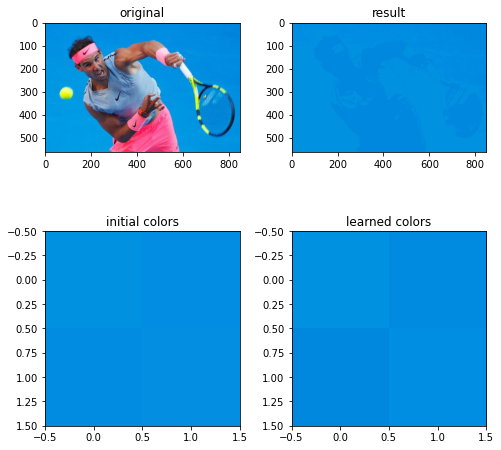

In [6]:
# read the image and return the RGB values for each pixel
img = plt.imread('nadal.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('Training SOM...')
# 20 x 20 neurons grid, 3 features
som = MiniSom(2, 2, 3, learning_rate=0.05, neighborhood_function='bubble')
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

Παρατηρούμε πως καθώς μεταβάλλουμε το μέγεθος MxM του πλέγματος και το μειώνουμε, η διακύμανση των τιμών του σφάλματος κβάντισης αυξάνεται. Αυτό συμβαίνει γιατί αυξάνονται τα clusters, άρα και το εύρος των τιμών που μπορεί να αναπαρασταθεί μέσω των βαρών των νευρώνων.

## <i>Να τρέξετε τον κώδικα της άσκησης για μεγέθη πλέγματος SOM 2x2, 3x3, 4x4, ..., 15x15, διατηρώντας το πλέγμα τετραγωνικό. Να σχεδιάσετε σε ένα γράφημα τις τιμές του σφάλματος κβάντισης. Τι παρατηρείτε σχετικά με την εξέλιξη της τιμής του σφάλματος κβάντισης, καθώς αυξάνεται το μέγεθος του πλέγματος;</i>


In [15]:
# read the image and return the RGB values for each pixel
img = plt.imread('nadal.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
#print('Training SOM...')
# Μ x Μ neurons grid, 3 features
quantization_error = []

i=0
for M in range(2, 16):
    som = MiniSom(M, M, 3, learning_rate=0.05, neighborhood_function='bubble')
    som.random_weights_init(pixels)
    starting_weights = som.get_weights().copy()  # saving the starting weights

    som.train(pixels, 10000, random_order=True, verbose=False)
    quantization_error.append(som.quantization_error(pixels))
    
    qnt = som.quantization(pixels)  # quantize each pixels of the image
    clustered = np.zeros(img.shape)
    i += 1
    for i, q in enumerate(qnt):  # place the quantized values into a new image
        clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

2x2 quantization error: 0.1357860335393988
15x15 quantization error: 0.028557276391077704


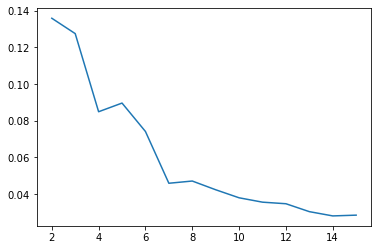

In [19]:
M_values = range(2, 16)

plt.plot(M_values, quantization_error)

print(f'2x2 quantization error: {quantization_error[0]}\n15x15 quantization error: {quantization_error[-1]}')

Παρατηρούμε ότι πράγματι αυξάνοντας τις τιμές του πλέγματος από 2x2 σε 15x15 το σφάλμα κβάντισης μειώνεται από 0.135 περίπου σε λιγότερο από 0.03.

## <i>Βασισμένοι στα αποτελέσματα των προηγούμενων ερωτημάτων να επιλέξετε, κατά προσέγγιση, το κατάλληλο μέγεθος πλέγματος που προσφέρει μία ικανοποιητική ανακατασκευή της αρχικής εικόνας, δηλαδή επιστρέφει αποδεκτό σφάλμα κβάντισης και αποδεκτό μέγεθος συμπίεσης. </i>

Παρατηρούμε ότι υπάρχουν 2 local minimums στις τιμές M=4 (4x4 πλέγμα) και M=7 (7x7 πλέγμα), επομένως θα διαλέξουμε μια από τις δύο τιμές. Μιας και το error στην περίπτωση του 7x7 είναι κάτω από 0.05, θα διαλέξουμε αυτό αυθαίρετα ώστε να έχουμε μικρότερο error. Παρακάτω φαίνεται η εικόνα που παράγεται στην περίπτωση αυτή (5x5)

Training SOM...
quantization...


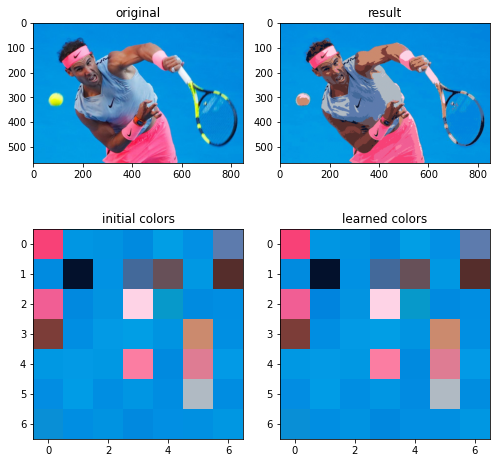

In [20]:
# read the image and return the RGB values for each pixel
img = plt.imread('nadal.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('Training SOM...')
# 20 x 20 neurons grid, 3 features
som = MiniSom(7, 7, 3, learning_rate=0.05, neighborhood_function='bubble')
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=False)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

Πράγματι βλέπουμε ότι επιτυγχάνεται συμπίεση, αλλά υπάρχει διακριτική ευχέρεια για την εικόνα και τον εικονιζόμενό της.

## <i>Να εφαρμόσετε το SOM grid που λάβατε στα προηγούμενα ερωτήματα για μία άλλη εικόνα του Nadal (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal2.jpg">nadal2.jpg</a>), που προέρχεται από τον ίδιο αγώνα. Η εικόνα αυτή έχει περίπου το ίδιο μέγεθος με την αρχική εικόνα. Τι παρατηρείτε; Στην περίπτωση που δίνατε ως είσοδο στο SOM έναν άλλο τενίστα, θα είχατε το ίδιο καλά αποτελέσματα;</i>


quantization...


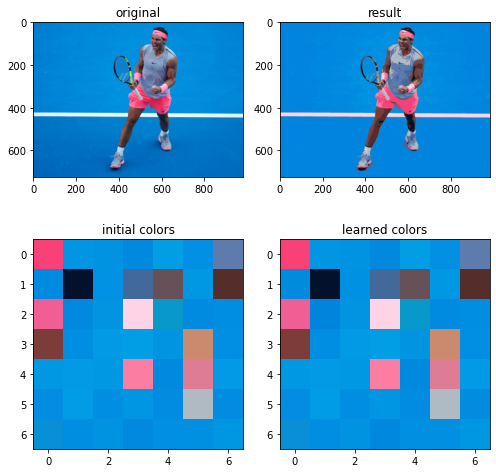

In [21]:
# read the image and return the RGB values for each pixel
img = plt.imread('nadal2.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

Βλέπουμε, λοιπόν, ότι για τον ίδιο αγώνα και τον ίδιο αθλητή το αποτέλεσμα είναι πολύ ικανοποιητικό. Αυτό ήταν αναμενόμενο μιας και οι χρωματικές παλέτες αναμένονταν να είναι πολύ κοντά για τις δύο εικόνες.

quantization...


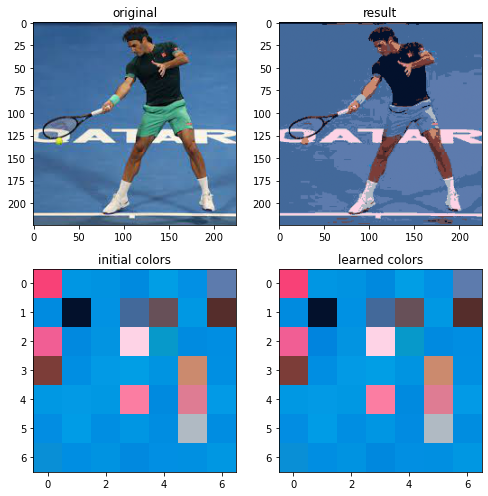

In [22]:
# read the image and return the RGB values for each pixel
img = plt.imread('federer.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

Στην περίπτωση άλλου αθλητή (πχ Federer παραπάνω) παρατηρούμε ότι η συμπίεση δουλεύει μεν αλλά η διακριτική ευχέρεια των χρωμάτων δεν είναι εξίσου καλή (πχ το πράσινο έχει γίνει mapped σε μπλε).